In [29]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
sleep_df = pd.read_csv('SleepAnalysis.csv')
sleep_df.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Clock,50,"<<HKDevice: 0x1c0a98ba0>, name:iPhone, manufac...",SleepAnalysis,NaN,2016-08-22 07:07:22 -0500,2016-08-21 23:02:16 -0500,2016-08-22 06:57:36 -0500,HKCategoryValueSleepAnalysisInBed
1,Clock,50,"<<HKDevice: 0x1c0a98830>, name:iPhone, manufac...",SleepAnalysis,NaN,2016-08-22 07:07:22 -0500,2016-08-22 07:06:48 -0500,2016-08-22 07:07:16 -0500,HKCategoryValueSleepAnalysisInBed
2,Clock,50,"<<HKDevice: 0x1c0a98740>, name:iPhone, manufac...",SleepAnalysis,NaN,2016-08-22 07:07:22 -0500,2016-08-22 07:07:16 -0500,2016-08-22 07:07:21 -0500,HKCategoryValueSleepAnalysisInBed
3,Clock,50,"<<HKDevice: 0x1c0a98790>, name:iPhone, manufac...",SleepAnalysis,NaN,2016-08-23 07:00:11 -0500,2016-08-23 00:41:40 -0500,2016-08-23 05:45:16 -0500,HKCategoryValueSleepAnalysisInBed
4,Clock,50,"<<HKDevice: 0x1c0a986a0>, name:iPhone, manufac...",SleepAnalysis,NaN,2016-08-23 07:00:11 -0500,2016-08-23 05:45:24 -0500,2016-08-23 06:43:08 -0500,HKCategoryValueSleepAnalysisInBed


In [22]:
# Extract necessary columns and rename
sleep = sleep_df[['startDate', 'endDate']]
sleep.columns = ['start', 'end']

# Remove timezone from date string, and convert to datetime object
sleep.start = pd.to_datetime(sleep.start.apply(lambda x: x[:-6]))
sleep.end = pd.to_datetime(sleep.end.apply(lambda x: x[:-6]))

# Calculate amount slept
sleep['amount'] = sleep.end - sleep.start

sleep.head()

/Users/kevin/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,start,end,amount
0,2016-08-21 23:02:16,2016-08-22 06:57:36,07:55:20
1,2016-08-22 07:06:48,2016-08-22 07:07:16,00:00:28
2,2016-08-22 07:07:16,2016-08-22 07:07:21,00:00:05
3,2016-08-23 00:41:40,2016-08-23 05:45:16,05:03:36
4,2016-08-23 05:45:24,2016-08-23 06:43:08,00:57:44


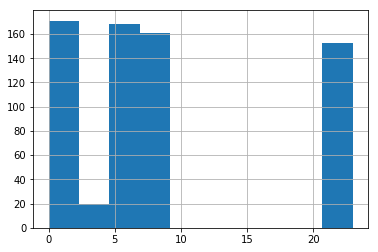

In [30]:
sleep.start.dt.strftime('%H').apply(int).hist()

In [31]:
sleep.tail(10)

,start,end,amount
663,2017-11-16 07:25:04,2017-11-16 07:43:18,00:18:14
664,2017-11-17 01:03:04,2017-11-17 07:25:10,06:22:06
665,2017-11-20 00:17:48,2017-11-20 07:52:40,07:34:52
666,2017-11-21 01:18:08,2017-11-21 07:42:44,06:24:36
667,2017-11-22 00:04:16,2017-11-22 07:14:12,07:09:56
668,2017-11-22 07:15:44,2017-11-22 07:31:16,00:15:32
669,2017-11-22 07:38:52,2017-11-22 07:42:20,00:03:28
670,2017-11-22 07:44:12,2017-11-22 07:45:02,00:00:50
671,2017-11-23 00:35:40,2017-11-23 07:41:08,07:05:28
672,2017-11-23 07:54:44,2017-11-23 08:01:55,00:07:11
